# Getting some baseline

So, I've been tuning now this model for too long. Probably it is good to just get some simple baselines and compare it to them to see how good we are in the end. 

In [1]:
%load_ext autoreload
%autoreload 2
import joblib
import pandas as pd
import sys
sys.path.append('../')
from sklearn.preprocessing import StandardScaler
from colorml.utils.utils import mapping_to_target_range, get_timestamp_string, plot_predictions, huber_fn, mapping_to_target_range_sig, read_pickle, augment_data
from colorml.utils.descriptornames import *

CHEMICAL_FEATURES = [
    "mc_CRY-chi-0-all",
    "mc_CRY-chi-1-all",
    "mc_CRY-chi-2-all",
    "mc_CRY-chi-3-all",
    "mc_CRY-Z-0-all",
    "mc_CRY-Z-1-all",
    "mc_CRY-Z-2-all",
    "mc_CRY-Z-3-all",
    "mc_CRY-I-1-all",
    "mc_CRY-I-2-all",
    "mc_CRY-I-3-all",
    "mc_CRY-T-0-all",
    "mc_CRY-T-1-all",
    "mc_CRY-T-2-all",
    "mc_CRY-T-3-all",
    "mc_CRY-S-0-all",
    "mc_CRY-S-1-all",
    "mc_CRY-S-2-all",
    "mc_CRY-S-3-all",
    "D_mc_CRY-chi-1-all",
    "D_mc_CRY-chi-2-all",
    "D_mc_CRY-chi-3-all",
    "D_mc_CRY-Z-1-all",
    "D_mc_CRY-Z-2-all",
    "D_mc_CRY-Z-3-all",
    "D_mc_CRY-T-1-all",
    "D_mc_CRY-T-2-all",
    "D_mc_CRY-T-3-all",
    "D_mc_CRY-S-1-all",
    "D_mc_CRY-S-2-all",
    "D_mc_CRY-S-3-all",
    "func-chi-0-all",
    "func-chi-1-all",
    "func-chi-2-all",
    "func-chi-3-all",
    "func-Z-0-all",
    "func-Z-1-all",
    "func-Z-2-all",
    "func-Z-3-all",
    "func-I-1-all",
    "func-I-2-all",
    "func-I-3-all",
    "func-T-0-all",
    "func-T-1-all",
    "func-T-2-all",
    "func-T-3-all",
    "func-S-0-all",
    "func-S-1-all",
    "func-S-2-all",
    "func-S-3-all",
    "func-alpha-0-all",
    "func-alpha-1-all",
    "func-alpha-2-all",
    "func-alpha-3-all",
    "D_func-chi-1-all",
    "D_func-chi-2-all",
    "D_func-chi-3-all",
    "D_func-Z-1-all",
    "D_func-Z-2-all",
    "D_func-Z-3-all",
    "D_func-T-1-all",
    "D_func-T-2-all",
    "D_func-T-3-all",
    "D_func-S-2-all",
    "D_func-S-3-all",
    "D_func-alpha-1-all",
    "D_func-alpha-2-all",
    "D_func-alpha-3-all",
    "f-lig-chi-0",
    "f-lig-chi-1",
    "f-lig-chi-2",
    "f-lig-chi-3",
    "f-lig-Z-0",
    "f-lig-Z-1",
    "f-lig-Z-2",
    "f-lig-Z-3",
    "f-lig-I-0",
    "f-lig-I-1",
    "f-lig-I-2",
    "f-lig-I-3",
    "f-lig-T-0",
    "f-lig-T-1",
    "f-lig-T-2",
    "f-lig-T-3",
    "f-lig-S-0",
    "f-lig-S-1",
    "f-lig-S-2",
    "f-lig-S-3",
    "lc-chi-0-all",
    "lc-chi-1-all",
    "lc-chi-2-all",
    "lc-chi-3-all",
    "lc-Z-0-all",
    "lc-Z-1-all",
    "lc-Z-2-all",
    "lc-Z-3-all",
    "lc-I-2-all",
    "lc-I-3-all",
    "lc-T-0-all",
    "lc-T-1-all",
    "lc-T-2-all",
    "lc-T-3-all",
    "lc-S-3-all",
    "lc-alpha-0-all",
    "lc-alpha-1-all",
    "lc-alpha-2-all",
    "lc-alpha-3-all",
    "D_lc-chi-2-all",
    "D_lc-chi-3-all",
    "D_lc-Z-1-all",
    "D_lc-Z-2-all",
    "D_lc-Z-3-all",
    "D_lc-T-1-all",
    "D_lc-T-2-all",
    "D_lc-T-3-all",
    "D_lc-alpha-1-all",
    "D_lc-alpha-2-all",
    "D_lc-alpha-3-all",
    "tertiary_amide_sum",
    "ester_sum",
    "carbonyl_sum",
    "logP_sum",
    "MR_sum",
    "aromatic_rings_sum",
    "dbonds_sum",
    "abonds_sum",
    "tertiary_amide_mean",
    "ester_mean",
    "carbonyl_mean",
    "logP_mean",
    "MR_mean",
    "aromatic_rings_mean",
    "dbonds_mean",
    "abonds_mean",
]

Using TensorFlow backend.


In [2]:
from sklearn.dummy import DummyRegressor

In [3]:
df_train = pd.read_csv('../data/development_set.csv')
df_test = pd.read_csv('../data/holdout_set.csv')

In [4]:
X_train = df_train[CHEMICAL_FEATURES]
X_test = df_test[CHEMICAL_FEATURES]

In [5]:
y_train = df_train[['r', 'g', 'b']].values / 255
y_test = df_test[['r', 'g', 'b']].values / 255

In [6]:
name_train = df_train['color_cleaned_x']
name_test = df_test['color_cleaned_x']

In [7]:
dummy_mean = DummyRegressor(strategy='mean')
dummy_median = DummyRegressor(strategy='median')

In [8]:
dummy_mean.fit(X_train, y_train)
dummy_median.fit(X_train, y_train)

DummyRegressor(strategy='median')

In [9]:
joblib.dump(dummy_mean, '../results/dummy_mean.joblib')

['../results/dummy_mean.joblib']

In [10]:
joblib.dump(dummy_median, '../results/dummy_median.joblib')

['../results/dummy_median.joblib']

In [11]:
mean_prediction_test = dummy_mean.predict(X_test)
median_predicton_test = dummy_median.predict(X_test)

/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/colorml/utils/utils.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


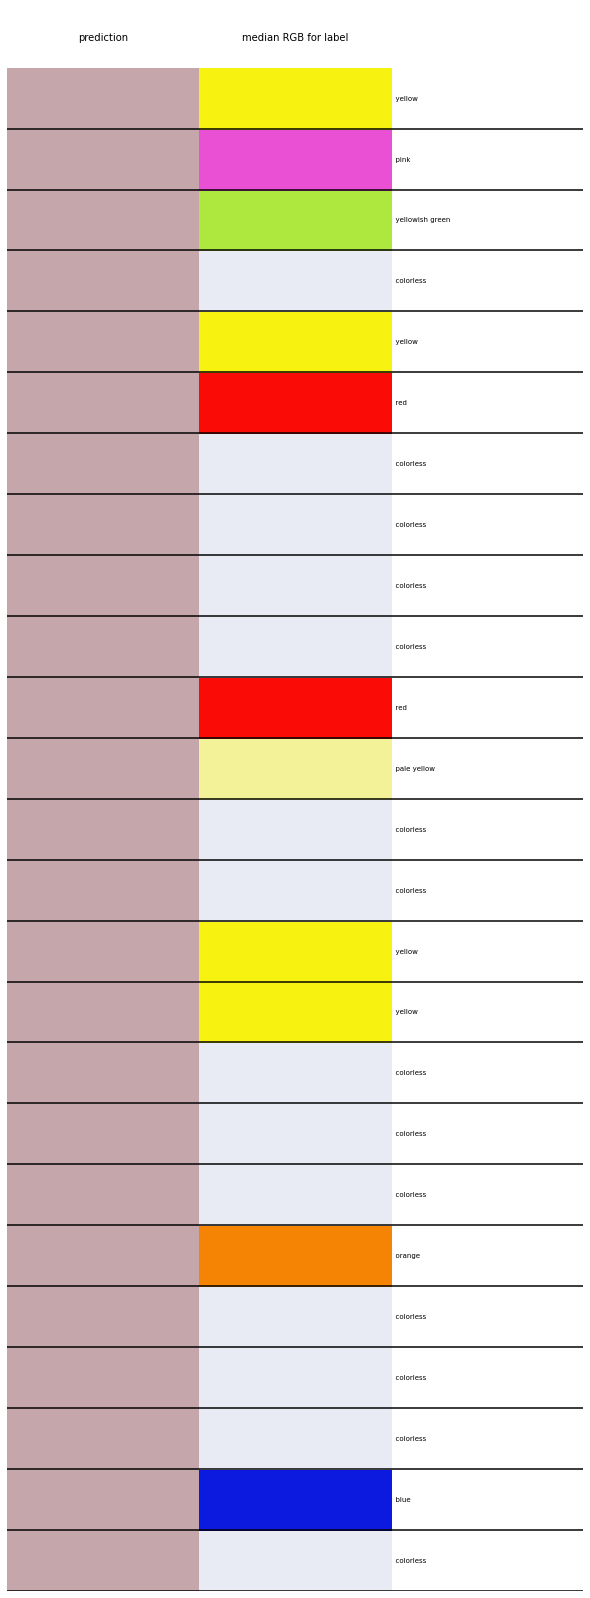

In [12]:
plot_predictions(mean_prediction_test * 255, 
                 y_test * 255,  name_test.values, 
                 sample=25, outname='mean_baseline.pdf')

/Users/kevinmaikjablonka/Dropbox (LSMO)/proj75_mofcolor/ml/colorml/utils/utils.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


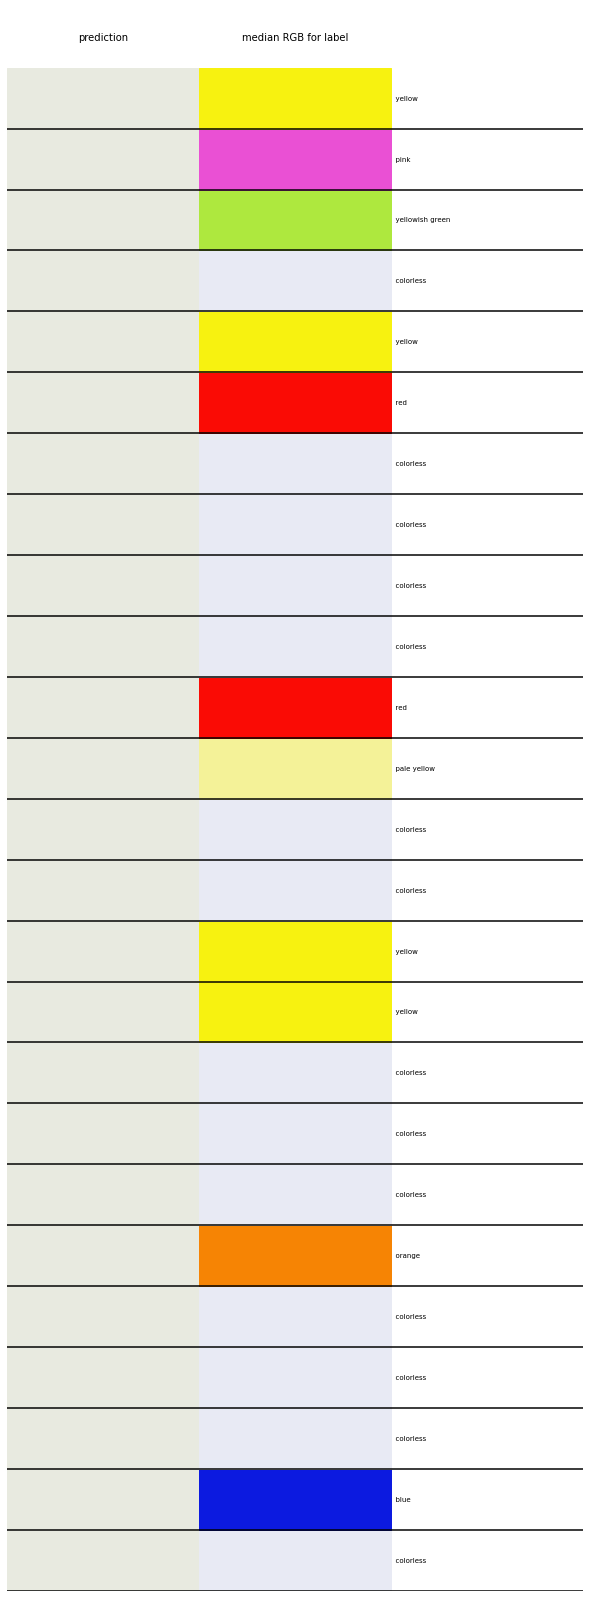

In [13]:
plot_predictions(median_predicton_test * 255, 
                 y_test * 255,  name_test.values, 
                 sample=25, outname='median_baseline.pdf')

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
knn1 = KNeighborsRegressor(1)
knn4 = KNeighborsRegressor(4)

In [8]:
knn1.fit(X_train, y_train)
knn4.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [9]:
knn1_prediction = knn1.predict(X_test)

In [10]:
knn4_prediction = knn4.predict(X_test)

In [11]:
plot_predictions(knn1_prediction * 255, 
                 y_test * 255,  name_test.values, 
                 sample=25, outname='knn1_baseline.pdf')

NameError: name 'name_test' is not defined

In [12]:
from sklearn.metrics import (mean_absolute_error, mean_squared_error, median_absolute_error, r2_score)
from colorml.utils.utils import pairwise_delta_es
import numpy as np

def get_metrics_dict(y_true: np.array, prediction) -> dict:  

    r2 = r2_score(y_true, prediction)
    mae = mean_absolute_error(y_true, prediction)
    mse = mean_squared_error(y_true, prediction)
    mdae = median_absolute_error(y_true, prediction)
    differences = pairwise_delta_es(y_true, prediction)

    return {
        'r2': r2,
        'mae': mae,
        'mse': mse,
        'mdae': mdae,
        'median_delta_e': np.median(differences),
        'mean_delta_e': np.mean(differences)
    }

In [13]:
plot_predictions(yscaler.inverse_transform(knn4_prediction), 
                 yscaler.inverse_transform(y_test),  name_test.values, 
                 sample=25, outname='knn4_baseline.pdf')

NameError: name 'yscaler' is not defined

In [14]:
get_metrics_dict(y_test, knn1_prediction)

{'r2': -0.03050017019174389,
 'mae': 0.18582692148589408,
 'mse': 0.13617502356282965,
 'mdae': 0.0,
 'median_delta_e': 0.0,
 'mean_delta_e': 20.79479051328238}

In [15]:
get_metrics_dict(y_test, knn4_prediction)

{'r2': 0.1803463590774567,
 'mae': 0.22110738810292055,
 'mse': 0.10828890949115634,
 'mdae': 0.14444444444444446,
 'median_delta_e': 22.560004216508975,
 'mean_delta_e': 24.85130176195722}